# <u> Sistemas adaptivos </u>

## Aplicaciones del algoritmo LMS
### Cancelación de ruido
Considere el escenario donde la señal de interés $s(n)$ es adquirida en un ambiente muy ruidoso $\varepsilon(n)$. De hecho, hay muchas situaciones como la mencionada en la vida real (voces en la cabina de un avión, manos libres de un automovil, hablar por un micrófono en un ambiente ruidoso, etc). Asuma que en adición al ruido de la señal, estamos en condiciones de grabar (por ejemplo, con otro micrófono) una señal más, lejos de la señal deseada. En ese caso, la otra señal $\eta(n)$ va a contener ruido solamente. Este ruido, se encuentra altamente correlacionado con el ruido $\varepsilon(n)$ en la señal deseada. En esas situaciones un sistema adaptivo como el de la figura será capaz de cancelar (reducir significativamente) el ruido en la señal deseada.


<img src="doc/esquema.png">

La señal de entrada en este caso es solamente el ruido $\eta(n)$, mientras que la señal de referencia es $s(n)+\varepsilon(n)$. Los ruidos $\eta(n)$ y $\varepsilon(n)$ están altamente correlacionados dado que ambos tienen la misma fuente en común. Sin embargo, los ruidos no son estrictamente los mismos dado que se propagan a través de diferentes trayectorias, y además presentan posibles reflexiones de paredes u objetos. La señal deseada $s(n)$ es estadísticamente independiente del ruido. El sistema adpativo, en un caso ideal, tratará de generar una señal de salida $y(n)$ tan cercana como sea posible a la señal de referencia $s(n)+\varepsilon(n)$. Dado que el ruido de entrada $\eta(n)$ está correlacionado con $\varepsilon(n)$ el sistema logrará la adaptación cuando
\begin{equation*}
\varepsilon(n) = \mathbf{H}^T(n)\mathbf{X}(n)
\end{equation*}
El error entonces es igual a la señal deseada
\begin{equation*}
e(n) = d(n)-y(n)=s(n)+ \varepsilon(n)-\mathbf{H}^T(n)\mathbf{X}(n) = s(n)
\end{equation*}


El ejercicio propuesto consiste en el diseño de un filtro adaptivo cuyos coeficientes se actualizan en función del tiempo para lograr reducir el ruido que contamina a una señal de interés.

Considere una señal $s(n)$ embebida en un ruido elevado $\varepsilon (n)$. La adquisición de la señal se realiza por medio de dos micrófonos. Uno cercano a la fuente de $s(n)$ y el otro lejos de la misma.

La señal $s(n)$ es la señal de interés para el caso de estudio. Al ruido $\varepsilon (n)$ se lo encuentra presente junto con la señal de interés. Al mismo tiempo, con fines didácticos se añade ruido blanco Gaussiano de media nula y varianza $\sigma_w^2=0.5$.

Usando un sistema adaptivo de orden $M=3$ reduzca el ruido de la señal grabada por el primer micrófono.


<img src="doc/block_diagram.png">

## Generación de señal de entrada
Ahora, se genera una señal de entrada sinusoidal compuesta de dos componentes, una que debe pasar, y otra que debe verse fuertemente atenuada debido a la respuesta del filtro

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import lfilter, firwin
from scipy.fftpack import fft,fftshift
from scipy import signal
from tool._fixedInt import *
from random import *
import sounddevice as sd
import soundfile as sf

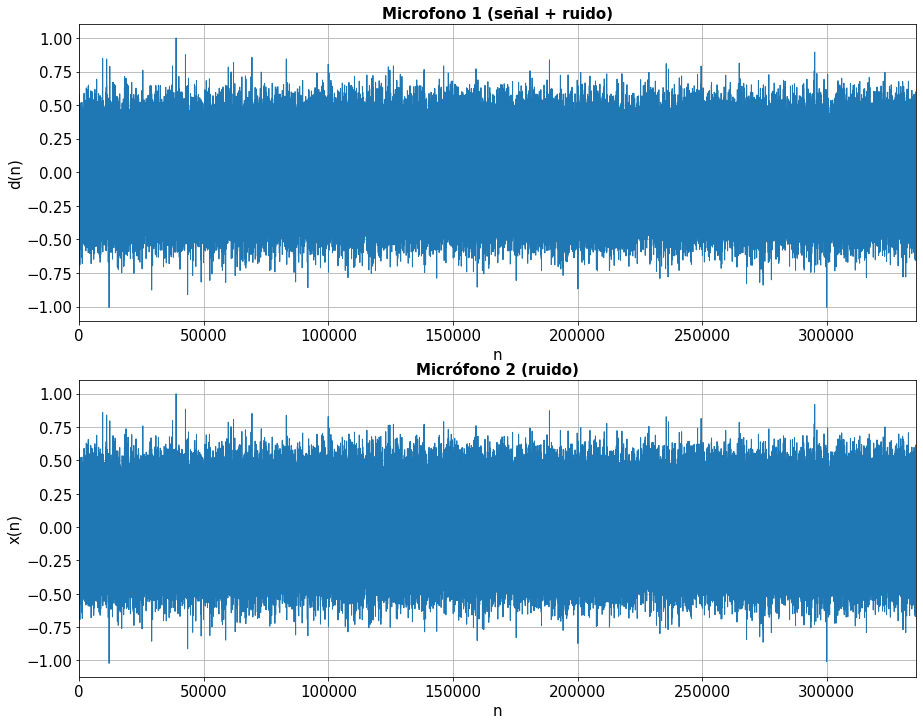

In [45]:
## Set de microfonos
mic_set = 'set1'

## Señal de interés
mic1_path = 'audios/'+mic_set+'/signal_plus_noise.wav'
mic1, fs   = sf.read(mic1_path)

## Fuente de ruido
mic2_path = 'audios/'+mic_set+'/noise_only.wav'
mic2, fs = sf.read(mic2_path)

if(len(mic1)>len(mic2)):
    T = len(mic2)-1
else:
    T = len(mic1)-1

Ts      = 1/fs
t       = np.arange(0,T/fs, Ts)
N       = len(t)
n       = np.arange(N)

## Generación de ruido extra
std_w = np.sqrt(0.5)
w     = std_w * np.random.randn(N)

## Normalizando señal y agregando ruido extra
d   = (mic1[:T]+w)/max(mic1[:T]+w)
x   = (mic2[:T]+w)/max(mic2[:T]+w)

plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
plt.plot(n,d, linewidth=1)
plt.title("Microfono 1 (señal + ruido)", fontsize=15, fontweight="bold")
plt.xlabel("n", fontsize=15)
plt.ylabel("d(n)", fontsize=15)
plt.xlim([0, N])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(n, x, linewidth=1)
plt.title("Micrófono 2 (ruido)", fontsize=15, fontweight="bold")
plt.xlabel("n", fontsize=15)
plt.ylabel("x(n)", fontsize=15)
plt.xlim([0, N])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)

# Filtrado de señal por medio del algoritmo LMS

A continuación se implementa la ecuación recursiva que da forma al algorimo LMS para el cálculo de los coeficientes del filtro. Se tiene que

\begin{align*}
\mathbf{H}(n+1) &= \mathbf{H}(n) + \mu \left(d(n)-y(n)\right)\mathbf{X}(n) \\
                &= \mathbf{H}(n) + \mu \left(d(n)-\mathbf{X}^T(n)\mathbf{H}(n)\right)\mathbf{X}(n) \\
                &= \mathbf{H}(n) + \mu e(n)\mathbf{X}(n)
\end{align*}

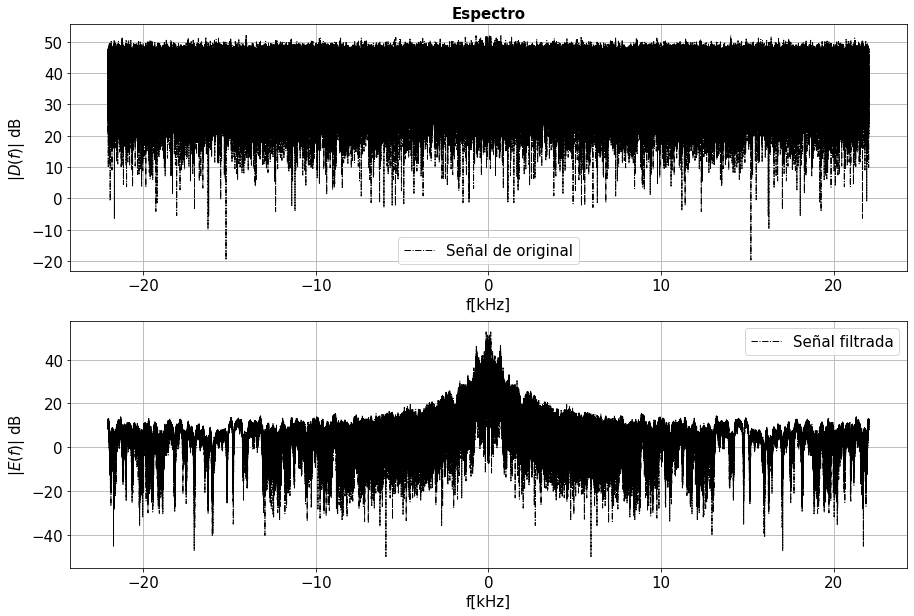

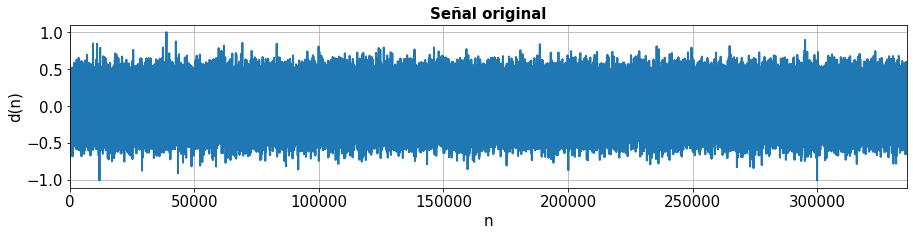

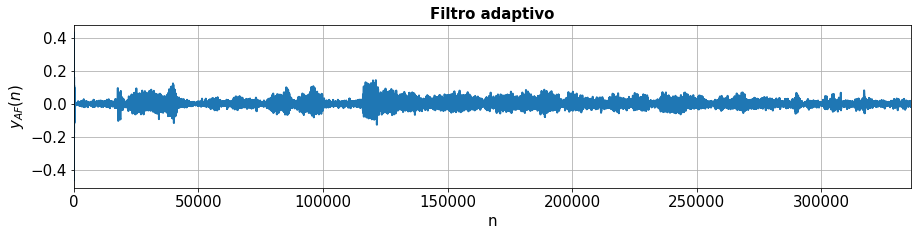

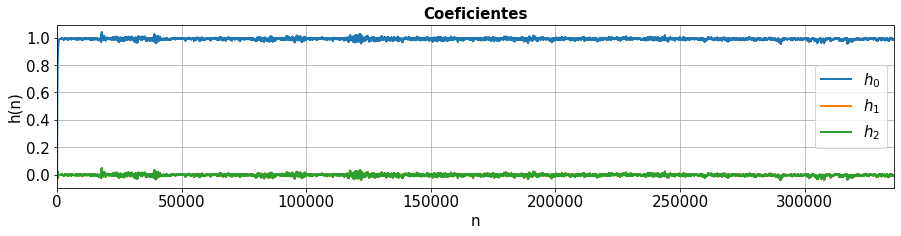

COEFICIENTES FINALES
h[0]=0.9886458684629603
h[1]=-0.0031108269577623236
h[2]=-0.003193455328718574
Reproduciendo señal ORIGINAL amplificada x3...
Reproduciendo señal FILTRADA amplificada x3...


In [46]:
M       = 3                # M taps
H       = np.zeros([M,N])   # Coeficientes
X       = np.zeros([M,1])   # Muestras

e       = np.zeros([N,1])   # Señal error
y       = np.zeros([N,1])   # Señal filtrada

u       = 0.15               # Paso de iteración

iteraciones = len(x) - 1
for i in range(iteraciones):
    # Registro de desplazamiento 
    X[1:, 0] = X[:-1, 0]
    X[0, 0]  = x[i]
    
    # Calculo de la salida
    y[i]     = np.dot(X[:,0].T, H[:, i])

    # Calculo de error
    e[i,0]   = d[i] - y[i]

    # Actualización de coeficientes
    H[:,i+1] = H[:,i] + u*e[i,0]*X[:,0]


# =============================== FFT PLOT ===============================
NFFT = N
E = fft(e[:,0], NFFT)
E = fftshift(E)
D = fft(d, NFFT)
D = fftshift(D)
f = np.arange(-fs/2, fs/2 - 1/(2*NFFT*Ts), 1/(NFFT*Ts))
 
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(f/1e3, 10*np.log10(abs(D)**2), '-.k', linewidth=1, label="Señal de original")
plt.title("Espectro", fontsize=15, fontweight="bold")
plt.xlabel("f[kHz]", fontsize=15)
plt.ylabel("$|D(f)|$ dB", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)

plt.subplot(212)
plt.plot(f/1e3, 10*np.log10(abs(E)**2), '-.k', linewidth=1, label="Señal filtrada")
plt.xlabel("f[kHz]", fontsize=15)
plt.ylabel("$|E(f)|$ dB", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

# =============================== SALIDAS ===============================
plt.figure(figsize=(15,3))
plt.plot(n,d, linewidth=2)
plt.title("Señal original", fontsize=15, fontweight="bold")
plt.xlabel("n", fontsize=15)
plt.ylabel("d(n)", fontsize=15)
plt.xlim([0, N])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

plt.figure(figsize=(15,3))
plt.plot(n,e, linewidth=2)
plt.title("Filtro adaptivo", fontsize=15, fontweight="bold")
plt.xlabel("n", fontsize=15)
plt.ylabel("$y_{AF}(n)$", fontsize=15)
plt.xlim([0, N])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()


# =============================== COEFICIENTES ===============================
colores = ['b', 'r', 'k']
plt.figure(figsize=(15,3))
for i in range(0,M):
    plt.plot(n,H[i,:], linewidth=2, label=f"$h_{i}$")
plt.title("Coeficientes", fontsize=15, fontweight="bold")
plt.xlabel("n", fontsize=15)
plt.ylabel("h(n)", fontsize=15)
plt.xlim([0, N])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()


h_final = []
print("COEFICIENTES FINALES")
for i in range(M):
    print(f"h[{i}]={H[i,-1]}")
    h_final.append(H[i,-1])

# Amplifico la señal para reproducirla
amp     = 3
d_amp   = amp*d
e_amp   = amp*e

# Reproduzco señal amplificada
print(f"Reproduciendo señal ORIGINAL amplificada x{amp}...")
sd.play(d_amp, fs)
sd.wait()

print(f"Reproduciendo señal FILTRADA amplificada x{amp}...")
sd.play(e_amp, fs)
sd.wait()

# Efectos de la cuantización

A continuación se realiza el modelado del algoritmo utilizando las mismas señales de entrada pero cuantizando la señal de interés.

El objetivo es analizar la degradación del sistema a medida que se utilizan diferentes tipos de representación de señal en punto fijo. En principio, se busca utilizar la representación S(8,7). Si la señal se ve sensiblemente dañada, se utilizará una representación que mejore el desempeño. Para realizar la cuantización, primero se normalizan los valores de las señales, es decir, previo al muestreo se normaliza.

En el esquema de la figura se muestra el punto donde se realiza la cuantización de las señales.

<img src="doc/cuantizacion.png">

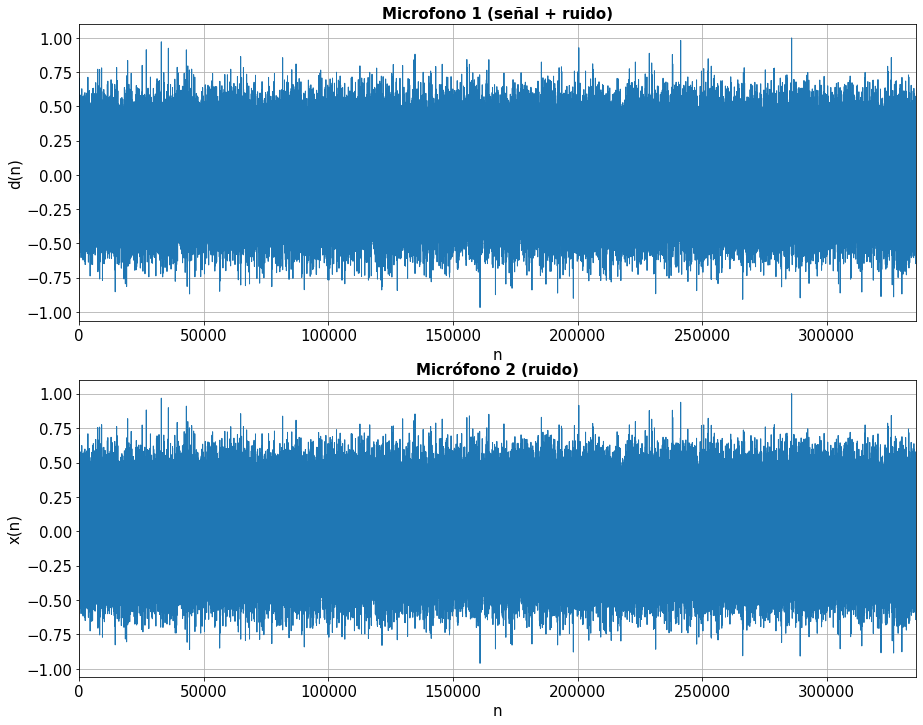

In [10]:
from tool._fixedInt import *

NB_INT  = 32
NB_FRAC = 16

# Datos utilizados en el calculo de los coeficientes
d_aux  = arrayFixedInt(NB_INT, NB_FRAC, d)
x_aux = arrayFixedInt(NB_INT, NB_FRAC, x)

d_fp    = np.array([i.fValue for i in d_aux])
x_fp    = np.array([i.fValue for i in x_aux])

plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
plt.plot(n,d_fp, linewidth=1)
plt.title("Microfono 1 (señal + ruido)", fontsize=15, fontweight="bold")
plt.xlabel("n", fontsize=15)
plt.ylabel("d(n)", fontsize=15)
plt.xlim([0, N])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(n, x_fp, linewidth=1)
plt.title("Micrófono 2 (ruido)", fontsize=15, fontweight="bold")
plt.xlabel("n", fontsize=15)
plt.ylabel("x(n)", fontsize=15)
plt.xlim([0, N])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)


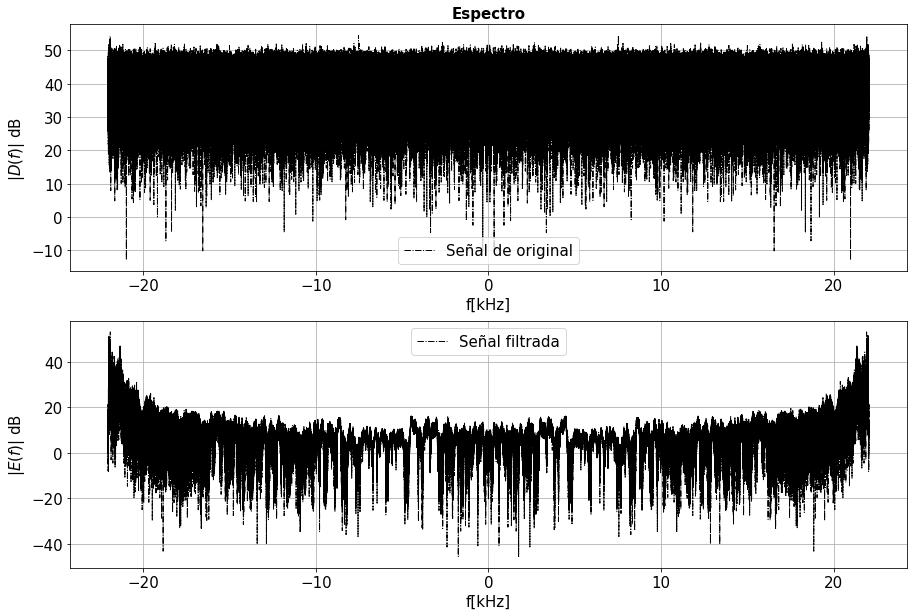

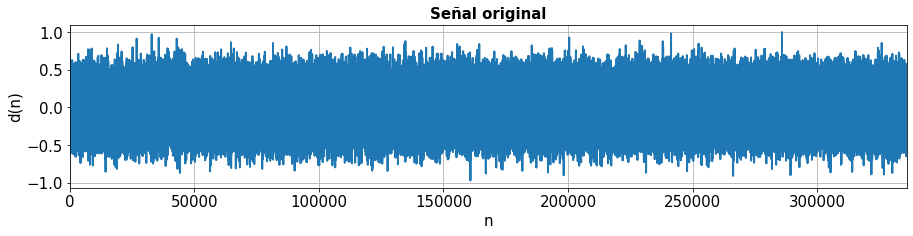

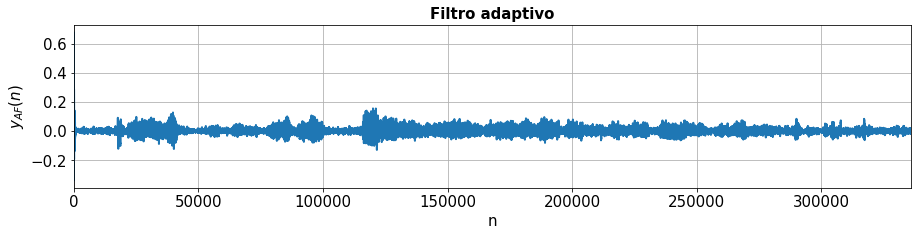

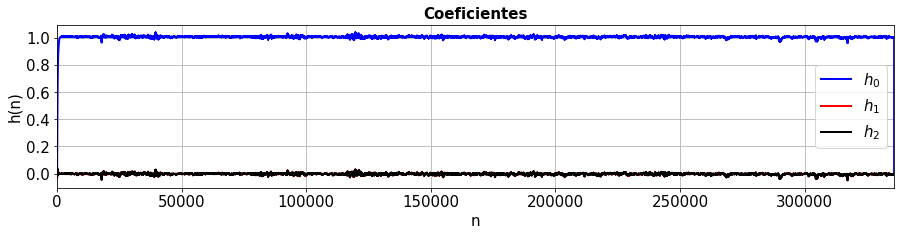

COEFICIENTES FINALES
h[0]=1.0003291301777442
h[1]=-0.008218882928490394
h[2]=-0.007525197497286517
Reproduciendo señal ORIGINAL amplificada x6...
Reproduciendo señal FILTRADA amplificada x6...


In [11]:
H_fp_final = np.zeros([M,N])
H_fp   = np.tile(arrayFixedInt(NB_INT,NB_FRAC, np.zeros(M)), (N,1)).T
X_fp   = arrayFixedInt(NB_INT,NB_FRAC, np.zeros([M]))
e_fp   = arrayFixedInt(NB_INT,NB_FRAC, np.zeros([N]))
y_fp   = arrayFixedInt(NB_INT,NB_FRAC, np.zeros([N]))
u_fp   = DeFixedInt(NB_INT, NB_FRAC)
u_fp.value = 0.1

for i in range(iteraciones):
    # Registro de desplazamiento
    for j in range(len(X_fp)-1):
        X_fp[M-1-j].value = X_fp[M-2-j].fValue
    X_fp[0].value  = x_fp[i]
    
    # Calculo de la salida
    y_fp[i].value = 0
    for j in range(len(X_fp)):
        y_fp[i].value = y_fp[i].fValue + X_fp[j].fValue * H_fp[j,i].fValue

    # Calculo de error
    e_fp[i].value   = d_fp[i] - y_fp[i].fValue

    # Actualización de coeficientes
    for j in range(len(X_fp)):
        H_fp[j,i+1].value = H_fp[j,i].fValue + u_fp.fValue * e_fp[i].fValue * X_fp[j].fValue
        H_fp_final[j][i] = H_fp[j,i+1].fValue

e_fp_final = [i.fValue for i in e_fp]

# =============================== FFT PLOT ===============================
NFFT = N
E_fp = fft(e_fp_final, NFFT)
E_fp = fftshift(E)
D_fp = fft(d_fp, NFFT)
D_fp = fftshift(D)

plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(f/1e3, 10*np.log10(abs(D_fp)**2), '-.k', linewidth=1, label="Señal de original")
plt.title("Espectro", fontsize=15, fontweight="bold")
plt.xlabel("f[kHz]", fontsize=15)
plt.ylabel("$|D(f)|$ dB", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)

plt.subplot(212)
plt.plot(f/1e3, 10*np.log10(abs(E_fp)**2), '-.k', linewidth=1, label="Señal filtrada")
plt.xlabel("f[kHz]", fontsize=15)
plt.ylabel("$|E(f)|$ dB", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

# =============================== SALIDAS ===============================
plt.figure(figsize=(15,3))
plt.plot(n,d_fp, linewidth=2)
plt.title("Señal original", fontsize=15, fontweight="bold")
plt.xlabel("n", fontsize=15)
plt.ylabel("d(n)", fontsize=15)
plt.xlim([0, N])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

plt.figure(figsize=(15,3))
plt.plot(n,e_fp_final, linewidth=2)
plt.title("Filtro adaptivo", fontsize=15, fontweight="bold")
plt.xlabel("n", fontsize=15)
plt.ylabel("$y_{AF}(n)$", fontsize=15)
plt.xlim([0, N])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

# =============================== COEFICIENTES ===============================
colores = ['b', 'r', 'k']
plt.figure(figsize=(15,3))
for i in range(0,M):
    plt.plot(n,H_fp_final[i,:], linewidth=2, color=colores[i], label=f"$h_{i}$")
plt.title("Coeficientes", fontsize=15, fontweight="bold")
plt.xlabel("n", fontsize=15)
plt.ylabel("h(n)", fontsize=15)
plt.xlim([0, N])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()



h_final = []
print("COEFICIENTES FINALES")
for i in range(M):
    print(f"h[{i}]={H[i,-1]}")
    h_final.append(H[i,-1])

# Amplifico la señal para reproducirla
amp         = 6
d_fp_amp    = amp*d_fp
e_fp_amp    = amp*e_fp_final

# Reproduzco señal amplificada
print(f"Reproduciendo señal ORIGINAL amplificada x{amp}...")
sd.play(d_fp_amp, fs)
sd.wait()

print(f"Reproduciendo señal FILTRADA amplificada x{amp}...")
sd.play(e_fp_amp, fs)
sd.stop()
sd.wait()

# Modelado a nivel registro (RTL)

## RTL
En la figura siguiente se encuentra la propuesta del esquemático que sintetiza al filtro adaptivo analizado

<img src="doc/filter_rtl.png">

En la imagen se puede observar la necesidad de a un esquema convencional de filtro FIR directo agregarle el bloque LMS que es el encargado de realizar la actualización de los coeficientes de dicho filtro. Por otra parte, resulta interesante remarcar la necesidad de agregarle M entradas al filtro LMS con el fin de evitar duplicar el registro de desplazamiento presente ya en el FIR.

Como se observa, dicho bloque depende del registro de desplazamiento de entrada y la función error, es decir, tiene dos entradas. Por otro lado, la salida del mismo bloque consiste en la actualización de los coeficientes, tal como se observa a continuación.

<img src="doc/lms_rtl.png">

## Aplicando saturación y truncado

A partir de las imágenes previas, es posible observar la necesidad de aplicar técnicas de saturación y truncado a la salida de los multiplicadores y sumadores que integran el sistema adaptivo, a continuación se observa la propuesta de dónde aplicar dichas operaciones para el filtro directo y el algoritmo LMS, respectivamente

<img src="doc/sat_trunc_fir.png">

<img src="doc/sat_trunc_lms.png">